# **Build Linear Regression Model in Python**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, I will be showing you how to build a linear regression model in Python using the scikit-learn package.

Inspired by [scikit-learn's Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

---

## **Load the Diabetes dataset** (via scikit-learn)

### **Import library**

In [1]:
from sklearn import datasets

### **Load dataset**

In [3]:
diabetes = datasets.load_diabetes()

In [4]:
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

### **Description of the Diabetes dataset**

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

### **Feature names**

In [6]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### **Create X and Y data matrices**

In [7]:
X = diabetes.data
Y = diabetes.target

In [8]:
X.shape, Y.shape

((442, 10), (442,))

### **Load dataset + Create X and Y data matrices (in 1 step)**

In [9]:
X, Y = datasets.load_diabetes(return_X_y=True)

In [10]:
X.shape, Y.shape

((442, 10), (442,))

## **Data split**

### **Import library**

In [11]:
from sklearn.model_selection import train_test_split

### **Perform 80/20 Data split**

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### **Data dimension**

In [13]:
X_train.shape, Y_train.shape

((353, 10), (353,))

In [14]:
X_test.shape, Y_test.shape

((89, 10), (89,))

## **Linear Regression Model**

### **Import library**

In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### **Build linear regression**

#### Defines the regression model

In [16]:
model = linear_model.LinearRegression()

#### Build training model

In [17]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Apply trained model to make prediction (on test set)

In [18]:
Y_pred = model.predict(X_test)

## **Prediction results**

### **Print model performance**

In [19]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [   8.52053323 -260.56120111  567.20637123  306.69734713 -853.44957415
  539.27919179  102.86940727  125.97645302  773.51685491   66.468307  ]
Intercept: 153.22662841093836
Mean squared error (MSE): 2419.85
Coefficient of determination (R^2): 0.57


### **String formatting**

By default r2_score returns a floating number ([more details](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html))

In [20]:
r2_score(Y_test, Y_pred)

0.5722115702709993

In [21]:
r2_score(Y_test, Y_pred).dtype

dtype('float64')

We will be using the modulo operator to format the numbers by rounding it off.

In [22]:
'%f' % 0.523810833536016

'0.523811'

We will now round it off to 3 digits

In [23]:
'%.3f' % 0.523810833536016

'0.524'

We will now round it off to 2 digits

In [24]:
'%.2f' % 0.523810833536016

'0.52'

## **Scatter plots**

### **Import library**

In [25]:
import seaborn as sns

### **Make scatter plot**

#### The Data

In [26]:
Y_test

array([262.,  85., 155., 237.,  78., 171., 150., 268.,  90., 214.,  84.,
       101.,  53., 243., 147., 212.,  78., 125., 178., 144.,  83., 185.,
        64., 126., 259.,  89.,  92.,  68.,  71., 131., 181.,  71., 115.,
       248., 242.,  91., 132., 233.,  72.,  51., 310., 236.,  52., 154.,
       197., 109.,  52.,  84.,  85., 206.,  45.,  39.,  78.,  79.,  93.,
        80., 113., 281.,  90., 111., 163., 297., 178., 220., 102., 265.,
       341., 141., 155., 310., 264., 183.,  48.,  85., 170., 111., 258.,
        63., 168., 174., 196., 111.,  99., 103., 128., 245., 138.,  51.,
       182.])

In [27]:
import numpy as np
np.array(Y_test)

array([262.,  85., 155., 237.,  78., 171., 150., 268.,  90., 214.,  84.,
       101.,  53., 243., 147., 212.,  78., 125., 178., 144.,  83., 185.,
        64., 126., 259.,  89.,  92.,  68.,  71., 131., 181.,  71., 115.,
       248., 242.,  91., 132., 233.,  72.,  51., 310., 236.,  52., 154.,
       197., 109.,  52.,  84.,  85., 206.,  45.,  39.,  78.,  79.,  93.,
        80., 113., 281.,  90., 111., 163., 297., 178., 220., 102., 265.,
       341., 141., 155., 310., 264., 183.,  48.,  85., 170., 111., 258.,
        63., 168., 174., 196., 111.,  99., 103., 128., 245., 138.,  51.,
       182.])

In [28]:
Y_pred

array([182.3132127 , 156.39190214, 161.88713967, 159.34177099,
        52.48419786, 170.47907834, 207.29817495, 223.98742797,
       176.44597912, 123.04969636,  95.7268594 ,  94.34603886,
       116.32858111, 272.60937779, 179.03854335, 190.79950845,
       123.02229791, 103.12172701, 129.11447277, 124.20183272,
       124.57421053, 157.01225782,  91.73359909, 175.72759387,
       157.47383453,  78.85348804, 125.57755015, 114.89881747,
       119.56328786, 163.54680631, 169.77711272, 116.29680901,
        92.7476209 , 219.62151514, 272.61757174,  92.32620082,
       121.86320459, 200.25503766,  59.64273571,  81.10596792,
       260.31846782, 233.53841935, 178.5831575 , 160.06274173,
       190.68104335, 208.75700338,  63.57387145, 100.24061523,
        57.83389049, 166.8986497 ,  31.21602917,  61.83840967,
       195.00882468, 115.10147788, 142.77197809,  78.71016623,
       159.05417738, 289.90072959, 149.82094299, 106.71544611,
       215.33054806, 207.41386932, 192.32353117, 266.91

#### Making the scatter plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


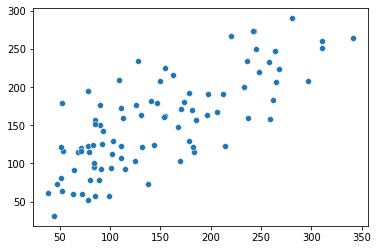

In [32]:
sns.scatterplot(Y_test, Y_pred)

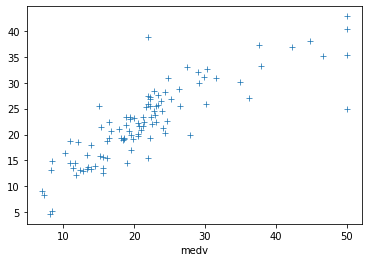

In [ ]:
sns.scatterplot(Y_test, Y_pred, marker="+")

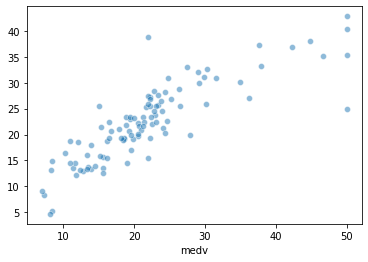

In [ ]:
sns.scatterplot(Y_test, Y_pred, alpha=0.5)